In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [2]:
fruits = pd.read_table('fruit_data_with_colors.txt')

In [3]:

fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [5]:
X = fruits[['mass','width','height','color_score']]
y = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=  0  )

<IPython.core.display.Javascript object>


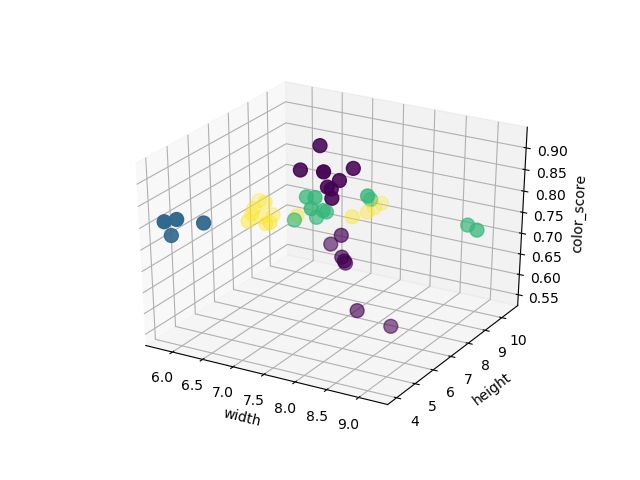

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

In [7]:
# Performing spilt function default split is 75-25%
X = fruits[['mass','width','height']]
y = fruits['fruit_label']

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 0)

In [8]:
# Creating a instances of classifier objects
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

In [9]:
# Train the classifier by passing in the training set data in the X_train and the labels in y_train
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [10]:
# Estimate the accuracy of the classifier on future data, using the test data
# Accuracy is defined as the fractions of test set items whose true label was correctly predicted by the classifier
knn.score(X_test, y_test)


0.5333333333333333

In [11]:
# Now we use trained k-NN classifier model to classify new, previously unseen objects

fruit_prediction = knn.predict([[20,4.3,5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [12]:

fruit_prediction = knn.predict([[100,6.3,5.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

C:\Users\lenovo\adspy_shared_utilities.py:190: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X_mat = X[['height', 'width']].as_matrix()
C:\Users\lenovo\adspy_shared_utilities.py:191: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y_mat = y.as_matrix()


<IPython.core.display.Javascript object>


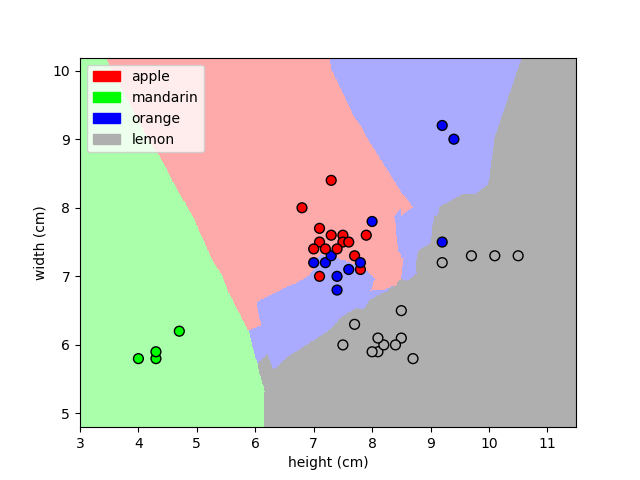

In [23]:
# Plot decision boundary of the K-NN classifier
# for this we use the plot fruit knn that is included in the shared utilities modules

from adspy_shared_utilities import plot_fruit_knn

plot_fruit_knn(X_train, y_train, 5, 'uniform');   # we choose 5 nearest neighbors
# Here the string 'uniform' means treat all neighbours equally when combining their labels

C:\Users\lenovo\adspy_shared_utilities.py:190: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X_mat = X[['height', 'width']].as_matrix()
C:\Users\lenovo\adspy_shared_utilities.py:191: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y_mat = y.as_matrix()


<IPython.core.display.Javascript object>


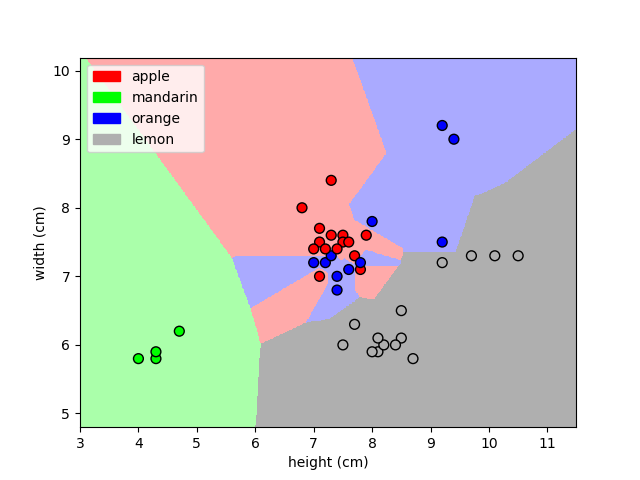

In [24]:
from adspy_shared_utilities import plot_fruit_knn

plot_fruit_knn(X_train, y_train, 1, 'uniform'); # here we choose 1 nearest neighbour

C:\Users\lenovo\adspy_shared_utilities.py:190: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X_mat = X[['height', 'width']].as_matrix()
C:\Users\lenovo\adspy_shared_utilities.py:191: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y_mat = y.as_matrix()


<IPython.core.display.Javascript object>


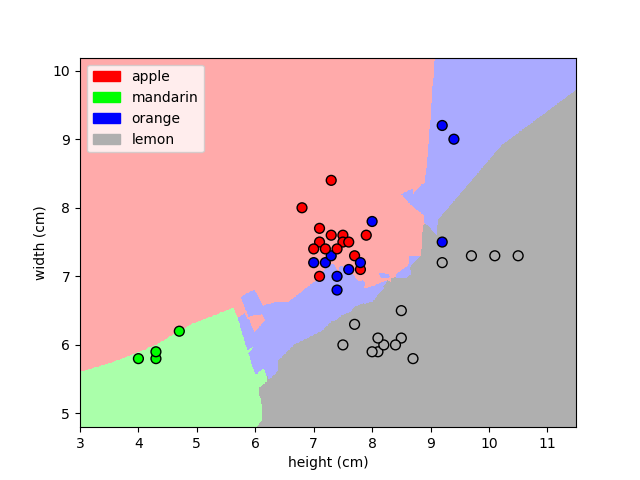

In [25]:
from adspy_shared_utilities import plot_fruit_knn

plot_fruit_knn(X_train, y_train, 10, 'uniform'); # Here we choose 10 nearest neighbours

<IPython.core.display.Javascript object>


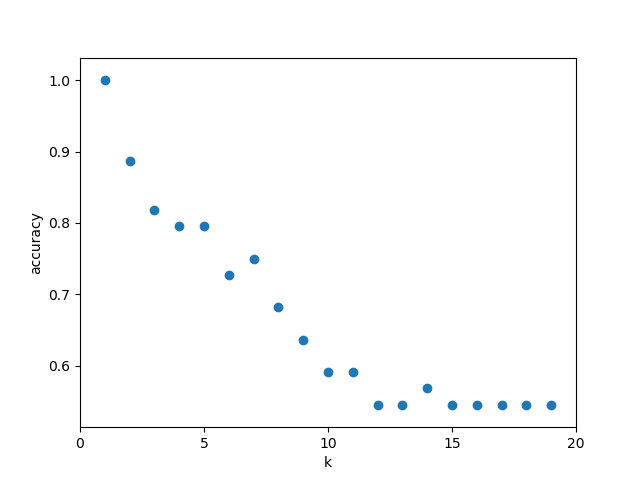

In [28]:
#Plotting the accuracy of k 
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_train, y_train))
    
    
    
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range,scores)
plt.xticks([0,5,10,15,20])
plt.show()
# Through this graph we can see that larger values of k lead to the worse accuracy for this particular dataset and the train split function